In [278]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [279]:
# To plot pass/shot maps, you need to get event data from the particular match

match_id = 69301 # Match ID for England W v Sweden W

In [280]:
# Update path to data

data_path = 'Desktop/Football Analytics/Data/'
data_provider = 'StatsBomb/data/'

In [281]:
# Load event data from the specific match

with open(data_path + data_provider + 'events/' + str(match_id) + '.json') as f:
    events = json.load(f)
# events

df_events = pd.json_normalize(events, record_prefix=None)
print(df_events.shape)
df_events.head()

(3291, 119)


,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,pass.cut_back,bad_behaviour.card.id,bad_behaviour.card.name,pass.no_touch,pass.straight,block.save_block,foul_committed.advantage,foul_won.advantage,foul_committed.card.id,foul_committed.card.name
0,e8643796-c76d-44f5-a03d-fa742e051942,1,1,00:00:00.000,0,0,1,0.00000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,937f83f8-674d-4c58-81d5-e2101a9f2e60,2,1,00:00:00.000,0,0,1,0.00000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87ba272a-3af0-4fc7-872f-65e8f79fb753,3,1,00:00:00.000,0,0,1,0.00000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85d30bef-8b77-405e-bc64-c63ed4d7a6d7,4,1,00:00:00.000,0,0,1,0.00000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140,0,0,2,0.16873,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
cols = df_events.columns
for i in cols:
    print(i)

id
index
period
timestamp
minute
second
possession
duration
type.id
type.name
possession_team.id
possession_team.name
play_pattern.id
play_pattern.name
team.id
team.name
tactics.formation
tactics.lineup
related_events
location
player.id
player.name
position.id
position.name
pass.recipient.id
pass.recipient.name
pass.length
pass.angle
pass.height.id
pass.height.name
pass.end_location
pass.body_part.id
pass.body_part.name
pass.type.id
pass.type.name
under_pressure
carry.end_location
pass.outcome.id
pass.outcome.name
ball_receipt.outcome.id
ball_receipt.outcome.name
out
clearance.left_foot
clearance.body_part.id
clearance.body_part.name
duel.type.id
duel.type.name
duel.outcome.id
duel.outcome.name
counterpress
pass.deflected
dribble.outcome.id
dribble.outcome.name
pass.switch
interception.outcome.id
interception.outcome.name
pass.inswinging
pass.technique.id
pass.technique.name
clearance.head
pass.cross
goalkeeper.type.id
goalkeeper.type.name
goalkeeper.outcome.id
goalkeeper.outcome.name


In [283]:
df_events['type.name'].value_counts()

Pass               921
Ball Receipt*      834
Carry              765
Pressure           236
Ball Recovery      126
Duel                72
Clearance           57
Block               41
Dispossessed        35
Goal Keeper         29
Miscontrol          25
Dribble             25
Foul Committed      23
Shot                19
Foul Won            19
Interception        19
Dribbled Past       18
Substitution         6
Injury Stoppage      6
Half End             4
Half Start           4
Tactical Shift       2
Error                2
Starting XI          2
Bad Behaviour        1
Name: type.name, dtype: int64

In [284]:
# Extract passes and shots into separate dataframes

df_passes = df_events[df_events['type.name'] == 'Pass']
df_shots = df_events[df_events['type.name'] == 'Shot']

print(df_passes.shape)
print(df_shots.shape)

(921, 119)
(19, 119)


In [285]:
# The column location indicates the starting location of the event

In [286]:
shot_cols = [i for i in df_shots.columns if i.startswith('shot')]
print(shot_cols)

['shot.statsbomb_xg', 'shot.end_location', 'shot.technique.id', 'shot.technique.name', 'shot.body_part.id', 'shot.body_part.name', 'shot.type.id', 'shot.type.name', 'shot.outcome.id', 'shot.outcome.name', 'shot.first_time', 'shot.freeze_frame', 'shot.key_pass_id', 'shot.saved_to_post', 'shot.one_on_one']


In [287]:
df_shots['shot.outcome.name'].value_counts()

Saved            7
Off T            4
Goal             3
Blocked          3
Wayward          1
Saved to Post    1
Name: shot.outcome.name, dtype: int64

In [288]:
df_shots['location']

339     [104.7, 45.5]
530     [110.9, 53.1]
719     [107.8, 26.1]
741      [93.7, 51.1]
955     [108.0, 52.7]
1326     [83.6, 47.1]
1484    [105.4, 25.5]
1576    [108.4, 53.3]
1782     [84.3, 31.3]
1794     [81.9, 35.2]
2011     [88.6, 39.9]
2204    [117.5, 48.2]
2261     [63.1, 79.4]
2325     [95.7, 39.3]
2961     [82.9, 38.3]
3093    [102.9, 51.5]
3119    [107.0, 37.7]
3168     [89.3, 33.5]
3196    [109.0, 33.4]
Name: location, dtype: object

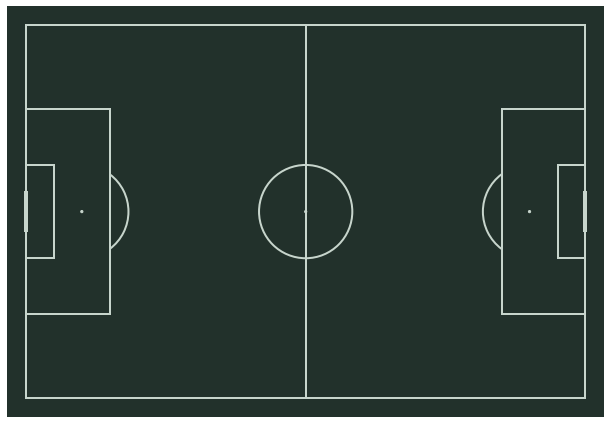

In [289]:
# Football PitchViz

from mplsoccer.pitch import Pitch

# Setup the pitch
pitch1 = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(10, 6),
              constrained_layout=False, tight_layout=True)

# StatsBomb Pitch Dimensions in yards - 120 x 80
fig1, ax1 = pitch1.draw()


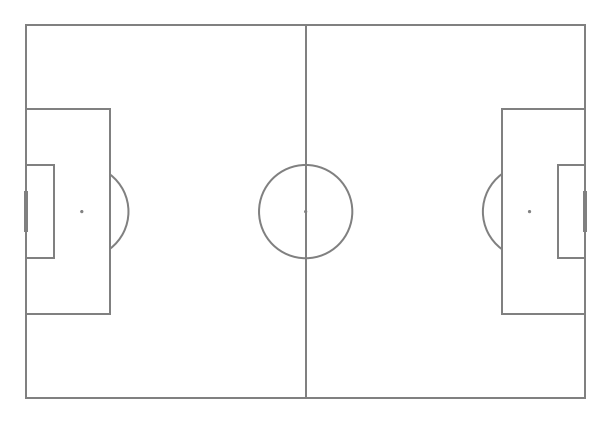

In [329]:
# Football PitchViz

from mplsoccer.pitch import Pitch

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='w', line_color='grey', figsize=(10, 6),
              constrained_layout=False, tight_layout=True)

# StatsBomb Pitch Dimensions in yards - 120 x 80
fig, ax = pitch.draw()

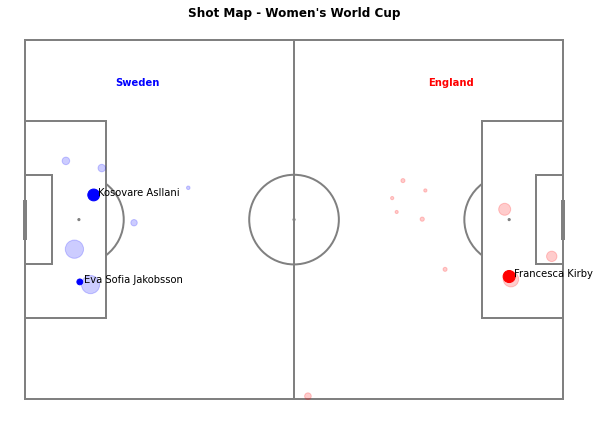

In [330]:
# Define Home (Red) and Away (Blue) Teams

home_team = "England Women's"
away_team = "Sweden Women's"

# StatsBomb Pitch Dimensions in yards

plX = 120
pwY = 80

# StatsBomb Pitch Dimensions in yards - 120 x 80

fig, ax = pitch.draw()

# Plot shot location coordinates. Also, size the shots proprotional to xG
# Annotate with Goal scorer names

plt.title("Shot Map - Women's World Cup", color='k', fontweight='bold')
plt.text(20, 10, "Sweden" , color='b', fontweight='bold')
plt.text(90, 10, "England" , color='r', fontweight='bold')

for index, shot in df_shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    r = np.sqrt(shot['shot.statsbomb_xg'] * 15) # Radius of circle
    if shot['team.name'] == home_team:
        if shot['shot.outcome.name'] == 'Goal':
            circle = plt.Circle((x, y), r, color='r', alpha=1)
            plt.text(x + 1, y, shot['player.name'], color='k')
        else:
            circle = plt.Circle((x, y), r, color='r', alpha=0.2)
    elif shot['team.name'] == away_team:
        if shot['shot.outcome.name'] == 'Goal':
            circle = plt.Circle((plX - x, pwY - y), r, color='b')
            plt.text(plX - x + 1, pwY - y, shot['player.name'], color='k')
        else:
            circle = plt.Circle((plX - x, pwY - y), r, color='b', alpha=0.2)
    
    ax.add_patch(circle)

In [292]:
# Football PitchViz

from mplsoccer.pitch import Pitch

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='w', line_color='grey', figsize=(10, 5),
              constrained_layout=False, tight_layout=True)

# StatsBomb Pitch Dimensions in yards - 120 x 80
# fig, ax = pitch.draw()

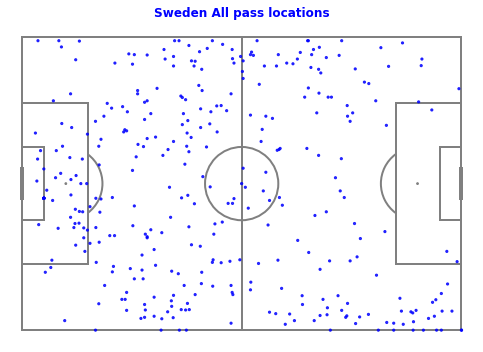

In [306]:
# Define Home (Red) and Away (Blue) Teams

home_team = "England Women's"
away_team = "Sweden Women's"

# StatsBomb Pitch Dimensions in yards

plX = 120
pwY = 80

# StatsBomb Pitch Dimensions in yards - 120 x 80

fig, ax = pitch.draw()

# Plot start location of all Sweden passes (left to right)

plt.title('Sweden All pass locations', color='b', fontweight='bold')
for index, passes in df_passes.iterrows():
    x = passes['location'][0]
    y = passes['location'][1]
    r = 0.3
    if passes['team.name'] == home_team:
        continue
    elif passes['team.name'] == away_team:
        circle = plt.Circle((x, y), r, color='b', alpha=0.8)
    ax.add_patch(circle)

In [294]:
pass_cols = [i for i in df_passes.columns if i.startswith('pass')]
print(pass_cols)

['pass.recipient.id', 'pass.recipient.name', 'pass.length', 'pass.angle', 'pass.height.id', 'pass.height.name', 'pass.end_location', 'pass.body_part.id', 'pass.body_part.name', 'pass.type.id', 'pass.type.name', 'pass.outcome.id', 'pass.outcome.name', 'pass.deflected', 'pass.switch', 'pass.inswinging', 'pass.technique.id', 'pass.technique.name', 'pass.cross', 'pass.assisted_shot_id', 'pass.shot_assist', 'pass.through_ball', 'pass.goal_assist', 'pass.aerial_won', 'pass.cut_back', 'pass.no_touch', 'pass.straight']


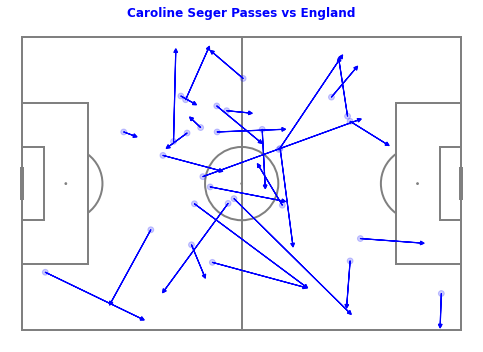

In [326]:
# Define Home (Red) and Away (Blue) Teams

home_team = "England Women's"
away_team = "Sweden Women's"

# StatsBomb Pitch Dimensions in yards

plX = 120
pwY = 80

# StatsBomb Pitch Dimensions in yards - 120 x 80

fig, ax = pitch.draw()

# Plot pass map for all passes made by Sara Caroline Seger (Sweden)

plt.title('Caroline Seger Passes vs England', color='b', fontweight='bold')
for index, passes in df_passes.iterrows():
    x_start = passes['location'][0]
    y_start = passes['location'][1]
    x_end = passes['pass.end_location'][0]
    y_end = passes['pass.end_location'][1]
    if passes['player.name'] == 'Sara Caroline Seger':
        circle = plt.Circle((x_start, y_start), 0.8, color='b', alpha=0.2)
        ax.add_patch(circle)
        pass_arrow = plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, 
                               color='b', head_width=1, head_length=1, width=0.05)
        ax.add_patch(pass_arrow)